# modules

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')


#import csv file

In [24]:
df = pd.read_csv("C:/Users/muhammad zuhair/Desktop/AI pro/shoping Mall_Customers.csv")

In [25]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

# statistical info


In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Expolatory data analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

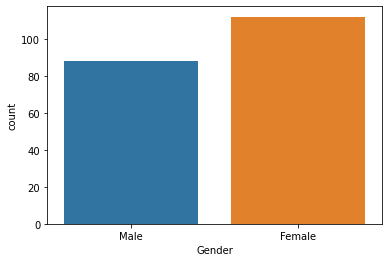

In [27]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

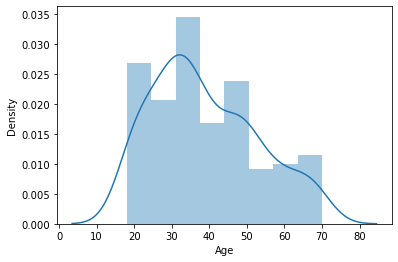

In [32]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

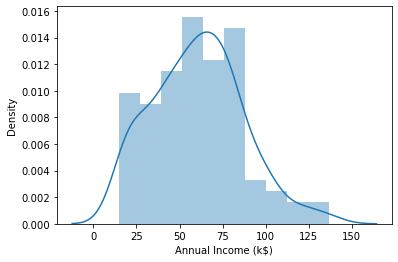

In [34]:
sns.distplot(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

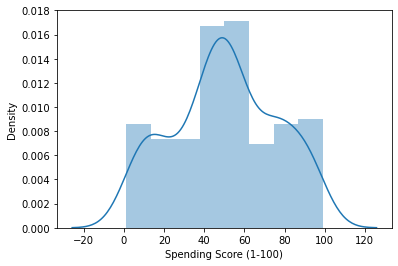

In [35]:
sns.distplot(df['Spending Score (1-100)'])

# correlation matrix

<AxesSubplot:>

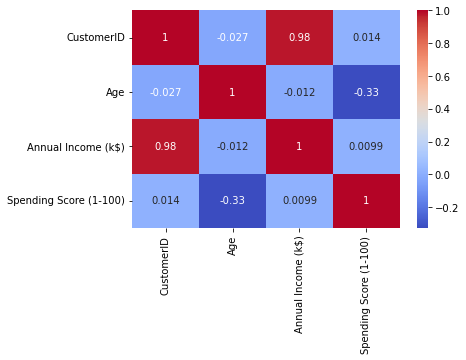

In [36]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

#clustering

In [37]:
df1 = df[['Annual Income (k$)','Spending Score (1-100)']]

In [39]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#scater plot

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

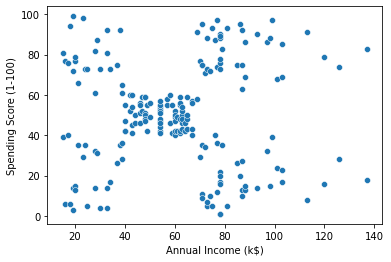

In [45]:
sns.scatterplot(df1['Annual Income (k$)'],df1['Spending Score (1-100)'])

In [52]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

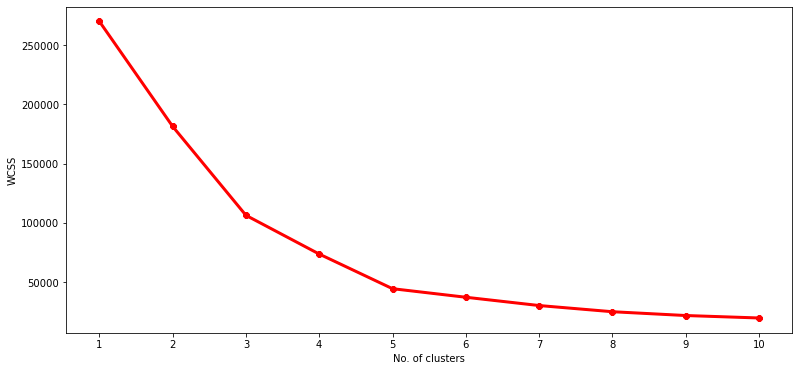

In [60]:
#plot the result of elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth= 3,color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [61]:
km = KMeans(n_clusters=5)
km.fit(df1)
y= km.predict(df1)
df1['label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,0
1,15,81,3
2,16,6,0
3,16,77,3
4,17,40,0


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

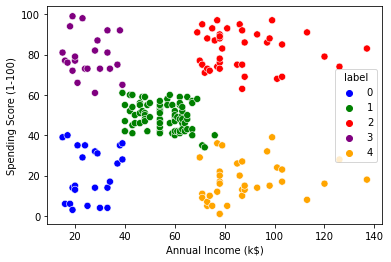

In [77]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)' , data=df1, hue='label', s=50, palette=['blue','green','red','purple','orange'])

In [79]:
#3 ATTRIBUTES
df2 = df[['Annual Income (k$)','Spending Score (1-100)','Age']]

In [80]:
df2.head()


,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [83]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

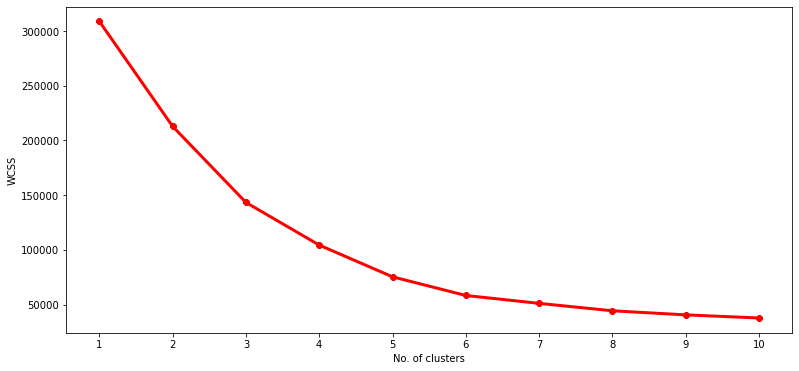

In [84]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth= 3,color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [85]:
km = KMeans(n_clusters=5)
km.fit(df2)
y= km.predict(df2)
df2['label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,label
0,15,39,19,4
1,15,81,21,1
2,16,6,20,4
3,16,77,23,1
4,17,40,31,4


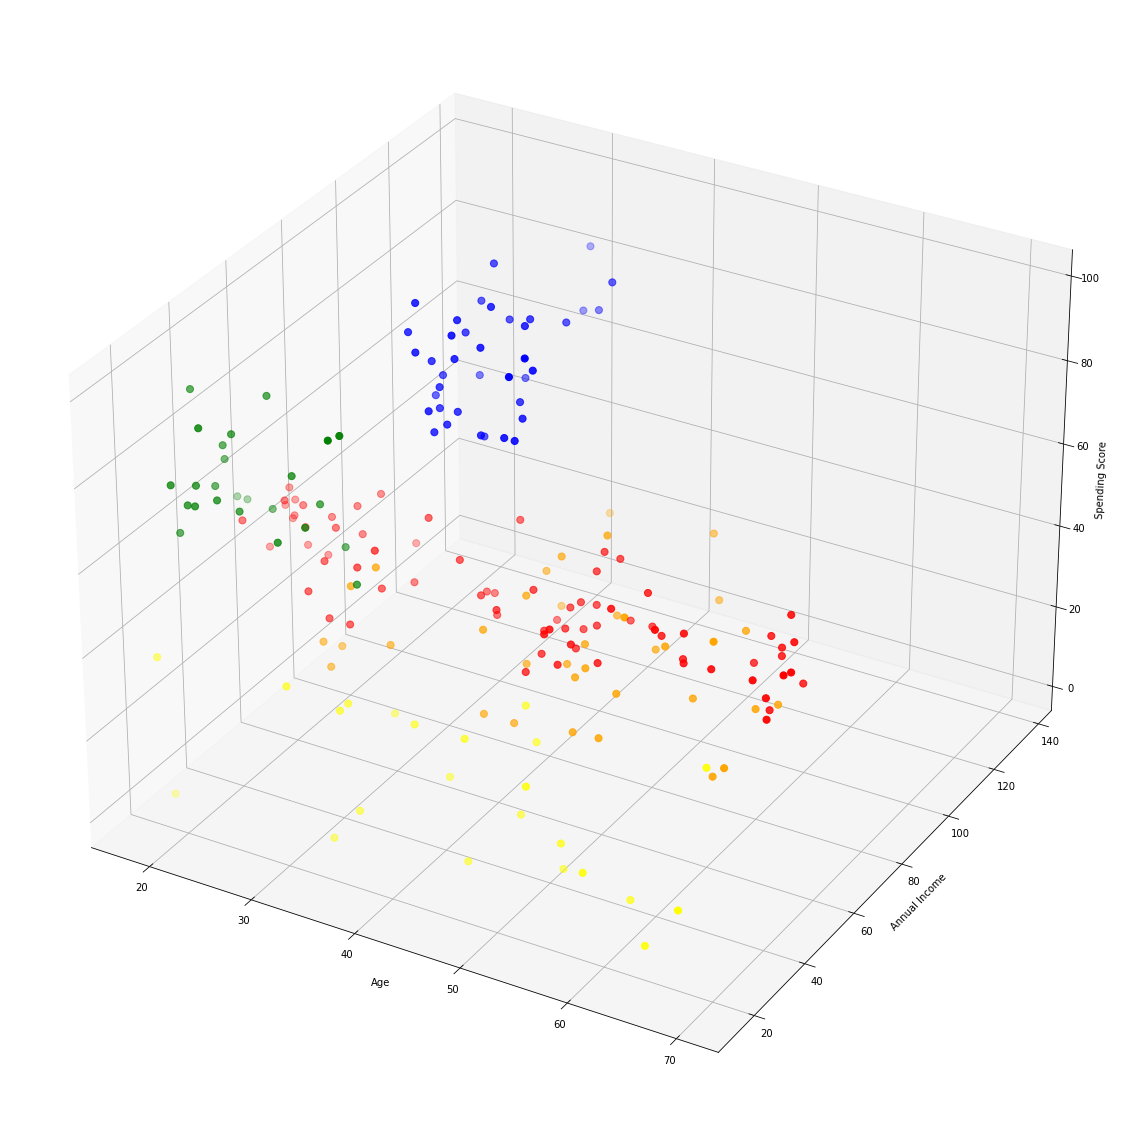

In [98]:
#3D PLOT
fig = plt.figure(figsize=(20,30))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df2['Age'][df2['label']==0],df2['Annual Income (k$)'][df2['label']==0],df2['Spending Score (1-100)'][df2['label']==0],c='red',s=50)
ax.scatter(df2['Age'][df2['label']==1],df2['Annual Income (k$)'][df2['label']==1],df2['Spending Score (1-100)'][df2['label']==1],c='green',s=50)
ax.scatter(df2['Age'][df2['label']==2],df2['Annual Income (k$)'][df2['label']==2],df2['Spending Score (1-100)'][df2['label']==2],c='blue',s=50)
ax.scatter(df2['Age'][df2['label']==3],df2['Annual Income (k$)'][df2['label']==3],df2['Spending Score (1-100)'][df2['label']==3],c='orange',s=50)
ax.scatter(df2['Age'][df2['label']==4],df2['Annual Income (k$)'][df2['label']==4],df2['Spending Score (1-100)'][df2['label']==4],c='yellow',s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()